# Aula 14

Hoje vamos fazer uma animação do movimento do pêndulo

## Resumo do que foi feito até agora

In [13]:
# Primeiramente definimos os valores das constantes que serão utilizadas no problema
import numpy as np
import matplotlib.pyplot as plt
g = 9.81
L = 5
m = 40

In [14]:
# Vamos definir uma função do método de Euler que sirva para qualquer função que queremos integrar independente do número de derivadas.
def euler(func, v0, step, n):
    """ Realiza a integração numérica de uma função utilizando o método de Euler de primeira ordem
    
    Parameters
    ----------
    func : function
        A função que calcula as derivadas que serão utilizadas na integração
    v0 : list
        A lista de condições iniciais do problema
    step : float
        O passo da integração. Será o mesmo para todas as derivadas
    n : int
        O número de pontos que serão gerados durante a integração
    """
    values = np.zeros((n, len(v0)))  # Cria uma tabela de n linhas e o número de colunas equivalente ao número de condições iniciais v0
    values[0] = np.array(v0)  # Define que a primeira linha da tabela são as próprias condições iniciais do problema.
    # Faz o loop para preencher as linhas seguintes
    for i in range(n-1):
        # Em cada linha aplicamos o método de Euler
        values[i+1] = values[i] + step*np.array(func(*values[i]))
    return values

In [15]:
# Definimos a função que calcula as derivadas do movimento do pêndulo
def pendulo(theta, w):
    """ Calcula as derivadas do movimento do pêndulo: Eq. 4 da Aula 12
    
    Parameters
    ----------
    theta : float
        O ângulo inicial, em radianos
    w : float
        A velocidade angular inicial, em radianos por segundo
    """
    dthetadt = w  # A derivada de theta em relação ao tempo
    dwdt = -(g/L)*np.sin(theta)  # A derivada de omega em relação ao tempo
    return dthetadt, dwdt

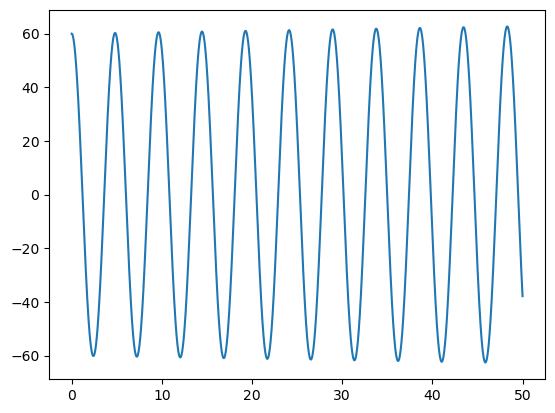

In [16]:
# Fazemos um teste
T = 50  # Instante final da integração
n = 50000  # Número de passos da integração
dt = T/n  # Calcula o passo da integração
t = np.arange(0, T, dt)

v0 = [60*np.pi/180, 0]  # theta0 e omega0
resultado = euler(pendulo, v0, dt, n)

theta = resultado[:,0]  # pega a primeira coluna da tabela
omega = resultado[:,1]  # pega a segunda coluna da tabela

plt.plot(t, theta*180/np.pi)

## Animação do movimento do pêndulo

Para fazer uma animação do movimento do pêndulo utilizaremos os comandos disponíveis em: https://nbviewer.org/urls/www.numfys.net/media/notebooks/simple_pendulum.ipynb

Abaixo está uma cópia do código, que será explicado comando a comando

In [17]:
# Para visualizar o movimento vamos utilizar as coordenadas cartesianas.
# Como partimos do princípio que o ângulo 0 está apontado para baixo na vertical,
# há uma pequena diferença entre os senos e cossenos usuais utilizados quando o ângulo 0 está na horizontal.
x = np.sin(theta)
y = -np.cos(theta)

# importamos do matplotlib o módulo de animação
# e importamos do Ipython a ferramenta para que a animação possa ser apresentada em HTML e visualizada no navegador
from matplotlib import animation
from IPython.display import HTML

# Quantos frames por segundo a animação deve apresentar
FPS=30  #
#plt.style.use('default')

# Cria o quadro onde a figura será desenhada no matplotlib e pega um ponteiro para o objeto deste quadro.
fig = plt.figure(figsize=(4, 4), dpi=60)

# Modifica os limites da figura para cobrir o quadro inteiro
ax = plt.axes(xlim=(-1.1, 1.1), ylim=(-1.1, 1.1))

# Garante que o eixo x e o eixo y possuam a mesma escala
ax.set_aspect('equal')

# remove os eixos que normalmente aparecem
ax.axis('off')

# Define os elementos da animação
rod, = ax.plot([], [], color="grey", linewidth=2)  # Cria uma linha e pega um ponteiro para o objeto desta linha
ball = plt.Circle((x[0], y[0]), 0.1, fc="grey")  # Cria um círculo e pega um ponteiro para o objeto desta círculo
ax.add_patch(ball)  # Adiciona o círculo à figura

# Pega o último valor do tempo para calcular o número de frames total
framesNum = int(FPS*t[-1])

def animate(j):
    """ Função de animação. Ela será chamada para cada frame
    
    Parameters
    ----------
    j : int
        Número do frame
    """
    # Calcula qual dos pontos da lista está mais perto do instante de cada frame.
    # Isso é necessário porque temos 30 frames por segundo, mas na integração tiveram mais pontos por segundo que isso.
    i = j*int(n/framesNum)
    
    # Em cada frame atualizamos a posição do círculo e da linha.
    # Isso é necessário porque consome mais processamento fazer plots diferentes para cada frame
    ball.center = (x[i], y[i])
    rod.set_data([0, x[i]], [0, y[i]])

# Cria a animação
anim = animation.FuncAnimation(fig, animate, frames=framesNum, interval=1000/FPS)

plt.close(anim._fig)

# Mostra a animação
# Deve demorar um pouco para aparecer.
HTML(anim.to_html5_video())

## Movimento do pêndulo com resistência do ar

Agora vamos supor que há resistência do ar no movimento do pêndulo. A força de resistência do ar pode ser aproximada por uma função proporcional à velocidade do movimento quando a velocidade for baixa, porém no sentido oposto, onde uma constante $b$ de proporcionalidade que depende das característica do ar (densidade, velocidade, etc.

$$f = -bv = -bL\omega \tag{1}$$

Colocando este termo no torque da equação (2) da Aula 12, temos:

\begin{equation}
mL^2\frac{d^2\theta}{dt^2} = L(-mg\sin(\theta) - bL\omega) \\
\frac{d^2\theta}{dt^2} = -\frac{g}{L}\sin(\theta) - \frac{b}{m}\omega
\tag{2}
\end{equation}

Desta forma, as duas equações diferenciais a serem integradas acabam sendo:

\begin{equation}
\frac{d\theta}{dt} = \omega\\
\frac{d\omega}{dt} = -\frac{g}{L}\sin{\theta} - \frac{b}{m}\omega
\tag{3}
\end{equation}

## Exercício para aula TDE

Suponha $b = 5 N.s/m$, refaça a integração incluindo a resistência do ar e crie uma animação deste movimento